In [1]:
import time
import numpy as np
from constants import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from build_model import model_tools

X = np.load('Norm_MinMax_%d_X.npy' % window_size)
y = np.load('Norm_MinMax_%d_y.npy' % window_size)

labels = np.unique(y)

le = LabelEncoder()
le.fit(y)
le_y = np.array(le.transform(y))
le_y = le_y.reshape((-1, 1))

ohe = OneHotEncoder()
ohe.fit(le_y)

y = ohe.transform(le_y).toarray()

In [2]:
model = model_tools(X, y, test_size=0.4, model_name='lstm_keras')

Model: "lstm_keras"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 34        
Total params: 2,146
Trainable params: 2,146
Non-trainable params: 0
_________________________________________________________________



[INFO] training network...
Epoch 1/5
159/159 [==============================] - 2s 12ms/step - loss: 0.6954 - accuracy: 0.5220 - auc: 0.5390 - val_loss: 0.6832 - val_accuracy: 0.5047 - val_auc: 0.7326 - lr: 0.0010
Epoch 2/5
159/159 [==============================] - 1s 7ms/step - loss: 0.6865 - accuracy: 0.5220 - auc: 0.5618 - val_loss: 0.6804 - val_accuracy: 0.5234 - val_auc: 0.7328 - lr: 0.0010
Epoch 3/5
159/159 [==============================] - 1s 8ms/step - loss: 0.7024 - accuracy: 0.4969 - auc: 0.5097 - val_loss: 0.6763 - val_accuracy: 0.5140 - val_auc: 0.7307 - lr: 0.0010
Epoch 4/5
159/159 [==============================] - 1s 8ms/step - loss: 0.6678 - accuracy: 0.5786 - auc: 0.6271 - val_loss: 0.6814 - val_accuracy: 0.5140 - val_auc: 0.7194 - lr: 0.0010
Epoch 5/5
159/159 [==============================] - 1s 7ms/step - loss: 0.5945 - accuracy: 0.6855 - auc: 0.7487 - val_loss: 0.5630 - val_accuracy: 0.6822 - val_auc: 0.8398 - lr: 0.0010

[INFO] evaluating network...
4/4 [======

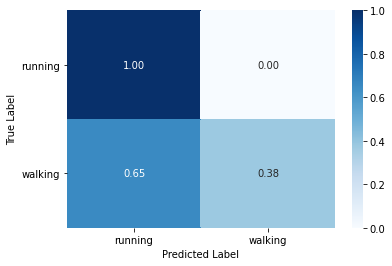

In [3]:
if not os.path.isdir(result_dir):  # For training
    os.mkdir(result_dir)
model.fit_and_save_model(es=False, mc=False, rlr=True, log=True)

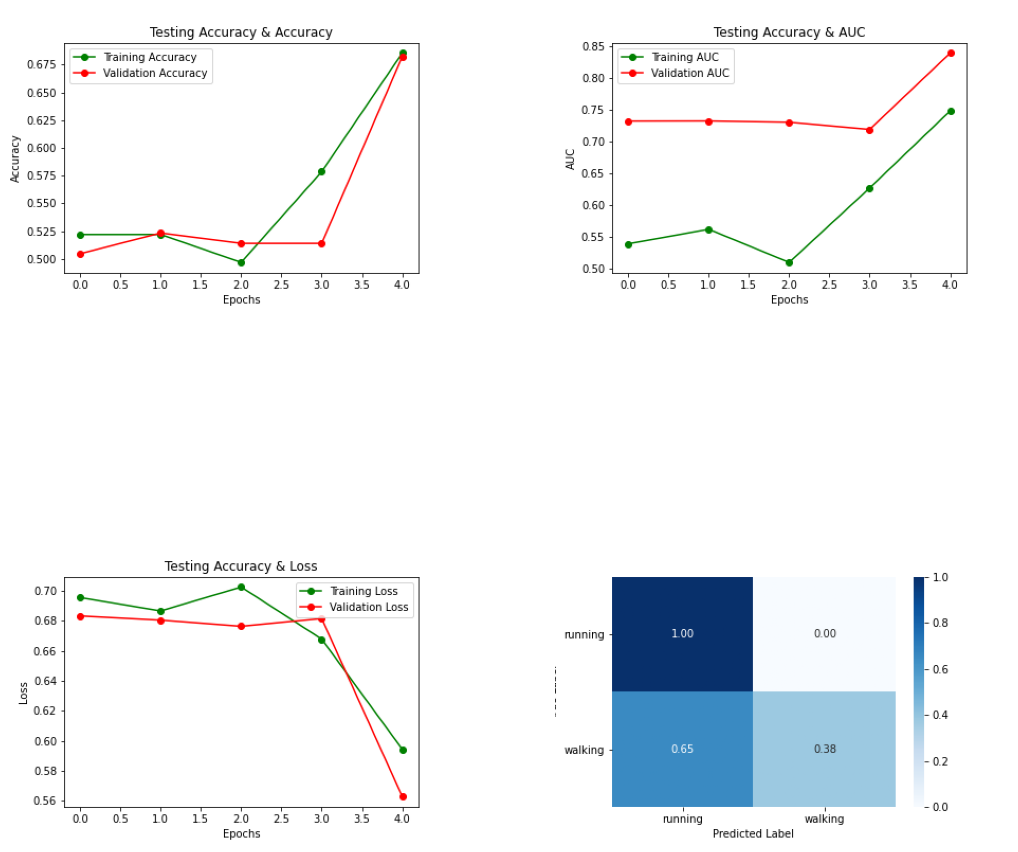

In [4]:
model.plt_fig()